ASSIGNMENT2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV


In [2]:
# Load Dataset
Data= pd.read_csv(r"C:\Users\mohan\Downloads\DAI\tips (data for regression problem).csv")
Data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Data Preprocessing
Data_encoded = pd.get_dummies(Data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = Data_encoded.drop(columns='tip') #Feature
y = Data_encoded['tip'] #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
#Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

#Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression -\nMSE:", mse_linear, "\nR^2:", r2_linear, "\nRMSE:", np.sqrt(mse_linear))


Linear Regression -
MSE: 0.7033566017436103 
R^2: 0.43730181943482516 
RMSE: 0.8386635807900629


In [5]:
#Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)
#Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression -\nMSE:", mse_ridge, "\nR^2:", r2_ridge, "\nRMSE:", np.sqrt(mse_ridge))

Ridge Regression -
MSE: 0.7007477213216077 
R^2: 0.4393889716178484 
RMSE: 0.8371067562274287


In [6]:
#Lasso Regression
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)
#Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression -\nMSE:", mse_lasso, "\nR^2:", r2_lasso, "\nRMSE:", np.sqrt(mse_lasso))

Lasso Regression -
MSE: 0.6791265936812351 
R^2: 0.45668627024964525 
RMSE: 0.8240913745946108


In [7]:
#DecisionTree Regression
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)
#Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree -\nMSE:", mse_tree, "\nR^2:", r2_tree, "\nRMSE:", np.sqrt(mse_tree))

Decision Tree -
MSE: 1.1603387755102041 
R^2: 0.07170769962173551 
RMSE: 1.077190222528131


In [8]:
#Ensemble Method
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)
#Evaluation
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest -\nMSE:", mse_forest, "\nR^2:", r2_forest, "\nRMSE:", np.sqrt(mse_forest))

Random Forest -
MSE: 0.8686011334693892 
R^2: 0.30510316356106615 
RMSE: 0.9319877324672193


In [23]:
#SVR
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression -\nMSE:", mse_svr, "\nR^2:", r2_svr, "\nRMSE:", np.sqrt(mse_svr))

Support Vector Regression -
MSE: 0.6524534436627769 
R^2: 0.47802527943520123 
RMSE: 0.8077459029068342


In [10]:
#KNN Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)
#Evaluation
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors -\nMSE:", mse_knn, "\nR^2:", r2_knn, "\nRMSE:", np.sqrt(mse_knn))

K-Nearest Neighbors -
MSE: 0.8763725714285714 
R^2: 0.29888587066985495 
RMSE: 0.9361477294896203


The best model is the one that achieves the highest R^2 and the lowest MSE. Therefore, in this case, Lasso regression is the best choice to estimate.

In [11]:
# Get the coefficients from the Lasso model
coefficients = lasso_reg.coef_

# Create a DataFrame to display feature names and their corresponding coefficients

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # assuming X_train is a DataFrame with feature names
    'Coefficient': coefficients
})

# Sort by absolute coefficient value to get the most important features
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the sorted feature importance
print(feature_importance_sorted)


      Feature  Coefficient  Abs_Coefficient
1        size     0.224668         0.224668
3  smoker_Yes    -0.137687         0.137687
4     day_Sat    -0.097552         0.097552
0  total_bill     0.094607         0.094607
2    sex_Male     0.000000         0.000000
5     day_Sun     0.000000         0.000000
6    day_Thur    -0.000000         0.000000
7  time_Lunch     0.000000         0.000000


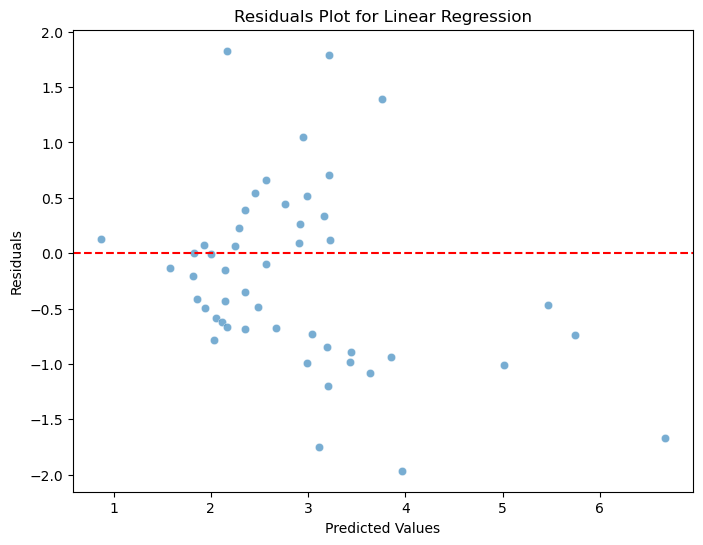

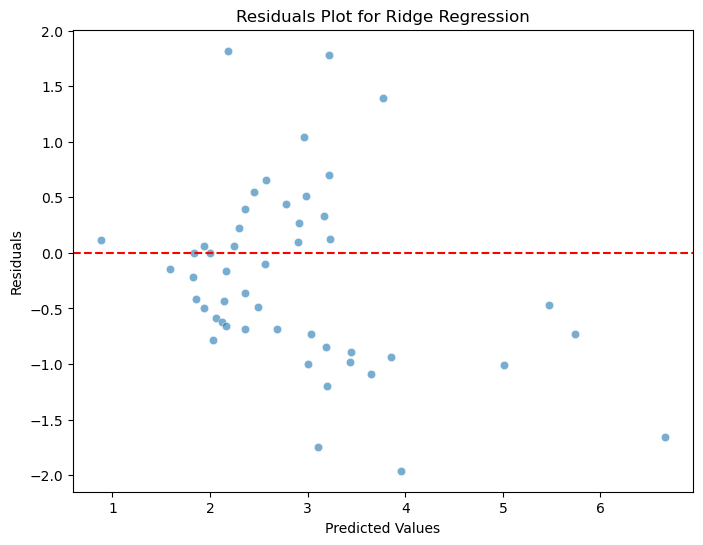

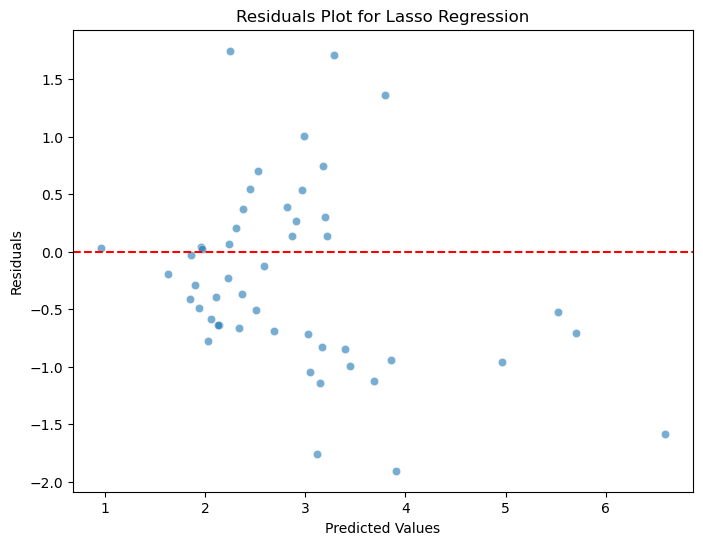

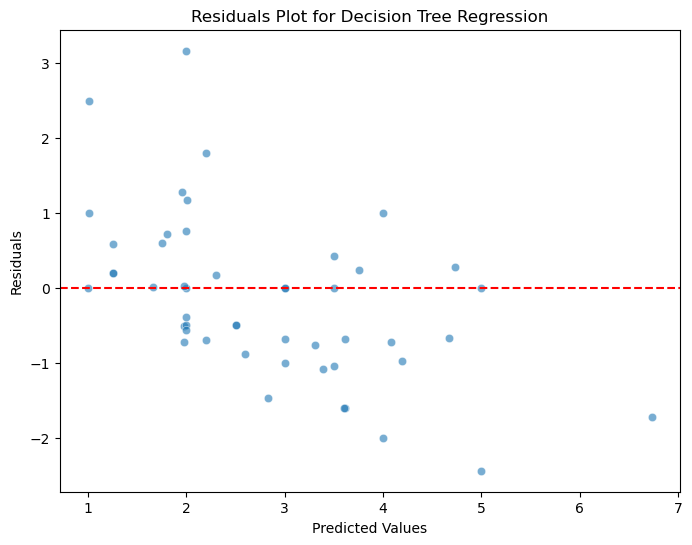

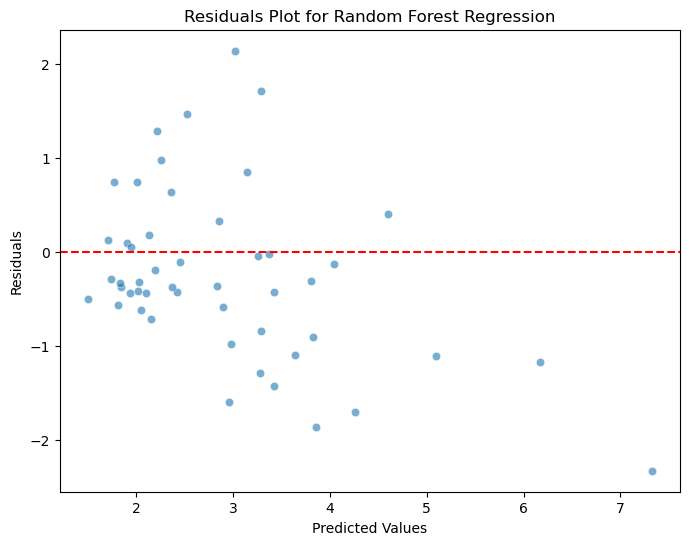

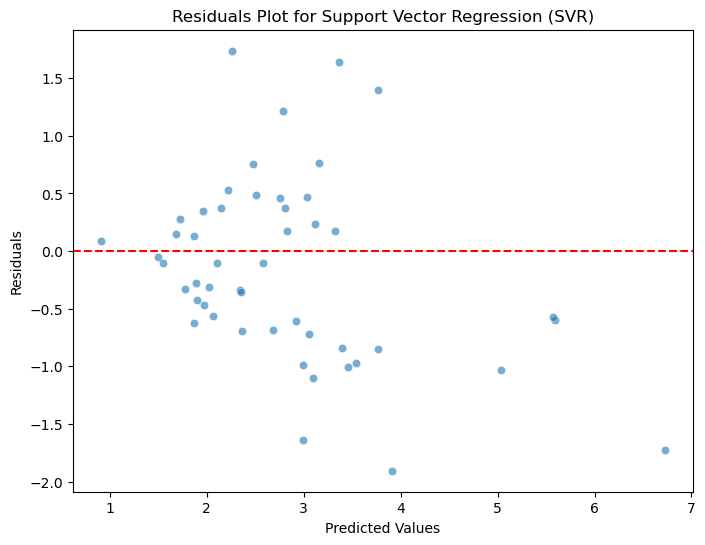

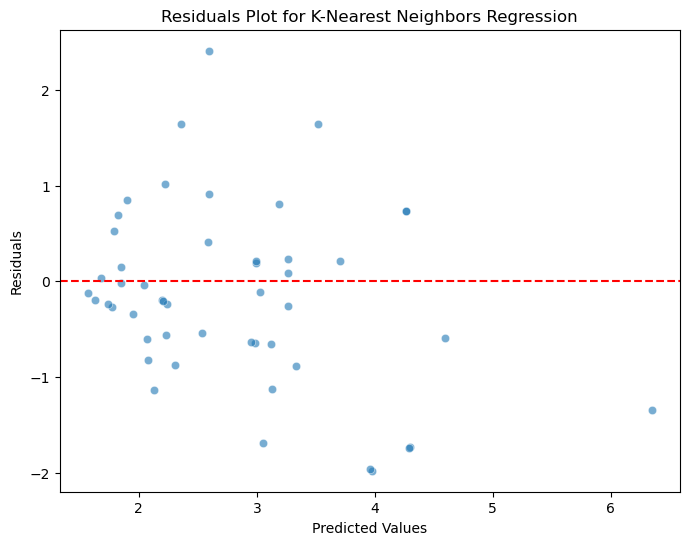

In [14]:
#Residual Plot
# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_linear = linear_reg.predict(X_test)
plot_residuals(y_test, y_pred_linear, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree_reg.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest_reg.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")
# 7. K-Nearest Neighbors Regression
y_pred_knn = knn_reg.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

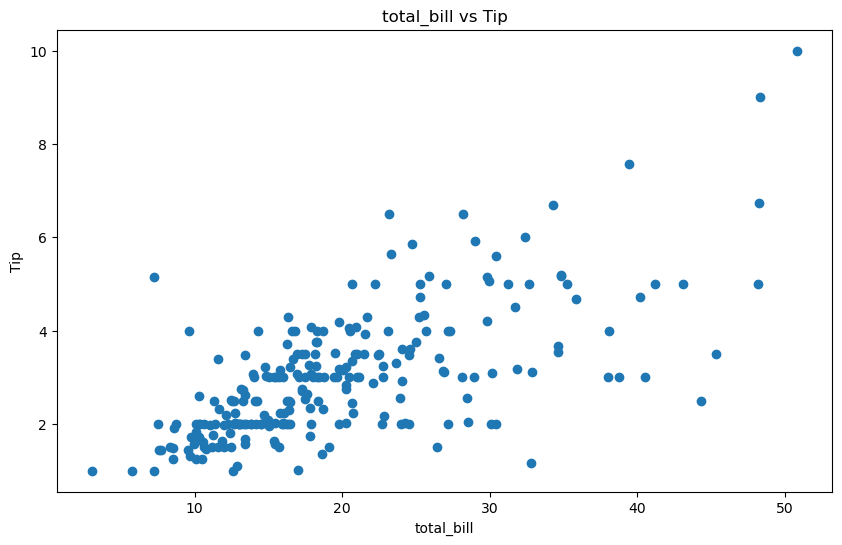

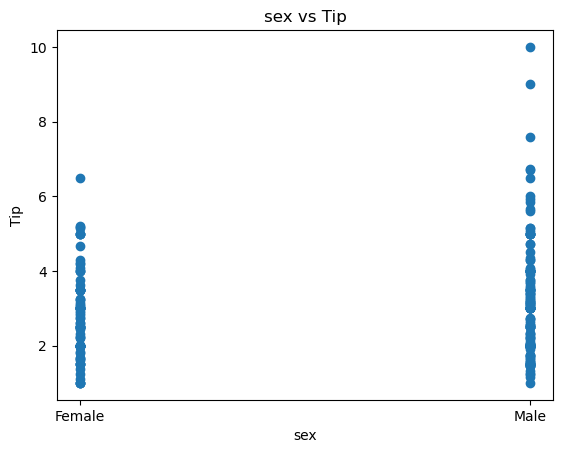

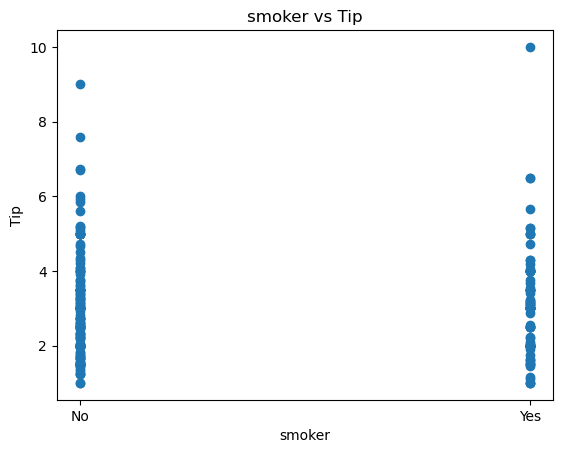

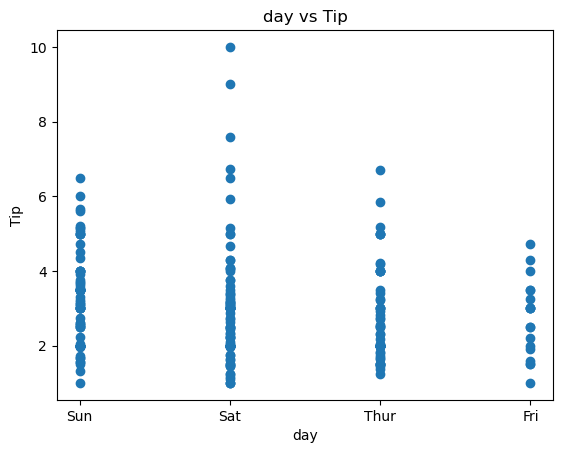

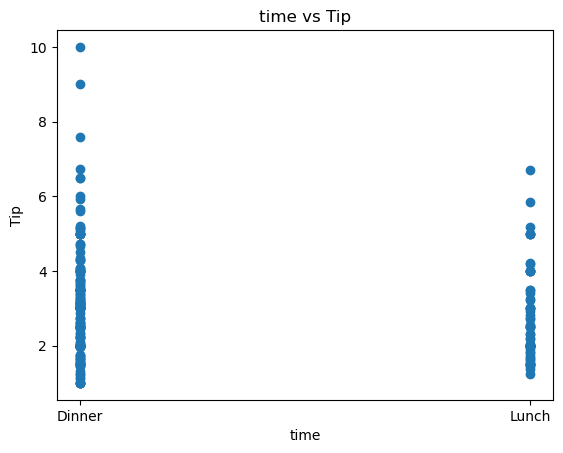

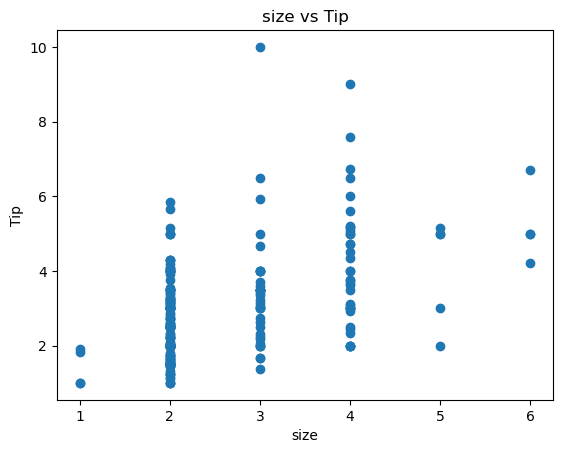

In [12]:
Data_features = Data.drop(columns=['tip'])
Data_target = Data['tip']

plt.figure(figsize=(10, 6))
# Scatter Plot
for i in range(0,6):
    plt.scatter(Data_features.iloc[:,i],Data_target)
    plt.xlabel(Data_features.columns[i])
    plt.ylabel('Tip')
    plt.title(Data_features.columns[i] + ' vs Tip')
    plt.show()

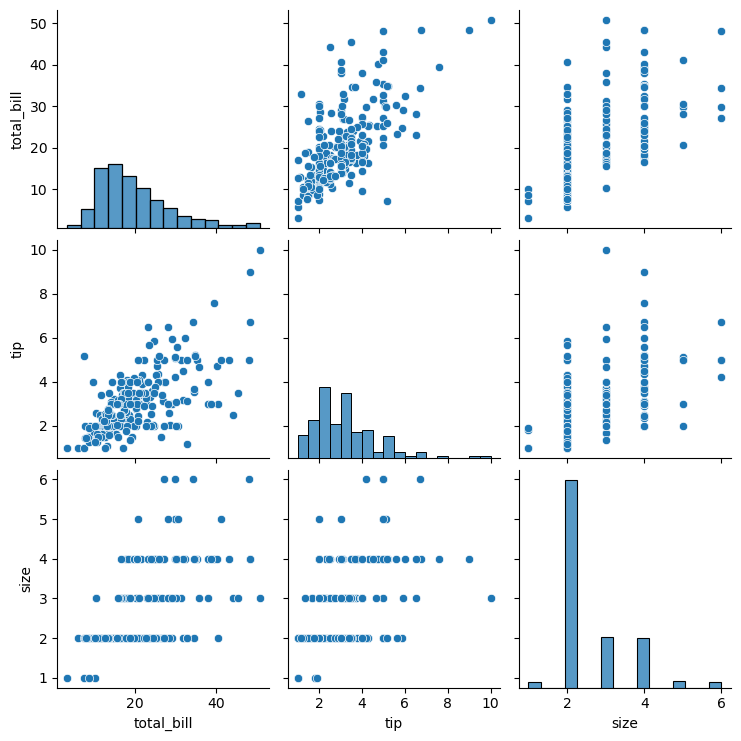

In [15]:
#Pair Plot For Multiple features
sns.pairplot(Data)

<Axes: >

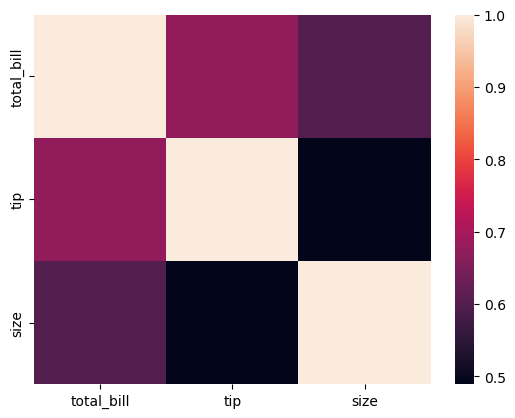

In [17]:
#Correlation Matrix (Heatmap)
Data_corr = Data[['total_bill', 'tip', 'size']].copy()
corr = Data_corr.corr()
sns.heatmap(corr)

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Data_features['sex'] = label_encoder.fit_transform(Data['sex'])
Data_features['smoker'] = label_encoder.fit_transform(Data['smoker'])
Data_features['day'] = label_encoder.fit_transform(Data['day'])
Data_features['time'] = label_encoder.fit_transform(Data['time'])

In [19]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
# Define independent (X) and dependent (y) variables
X = Data_features
X = sm.add_constant(X)
y = Data_target

# Fit the linear regression model
model = sm.OLS(y, X).fit()

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")


Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


The Rainbow test's p-value (0.15798464222013167) is greater than 0.05, suggesting there’s no significant evidence against linearity. This implies your model meets the linearity assumption.

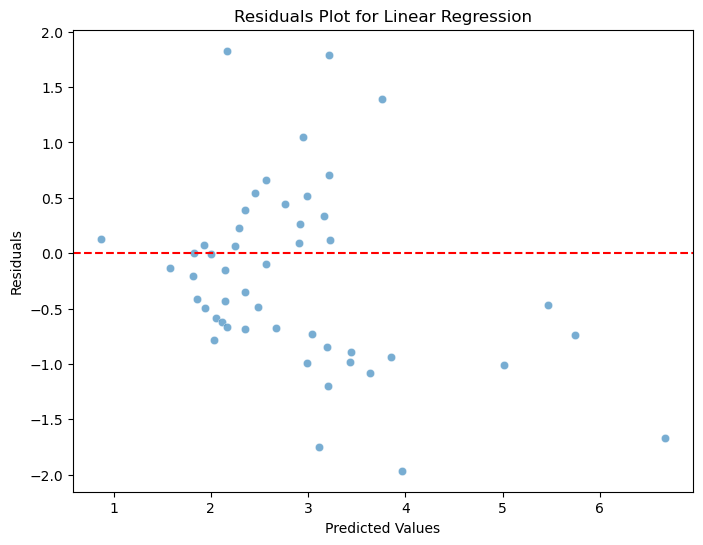

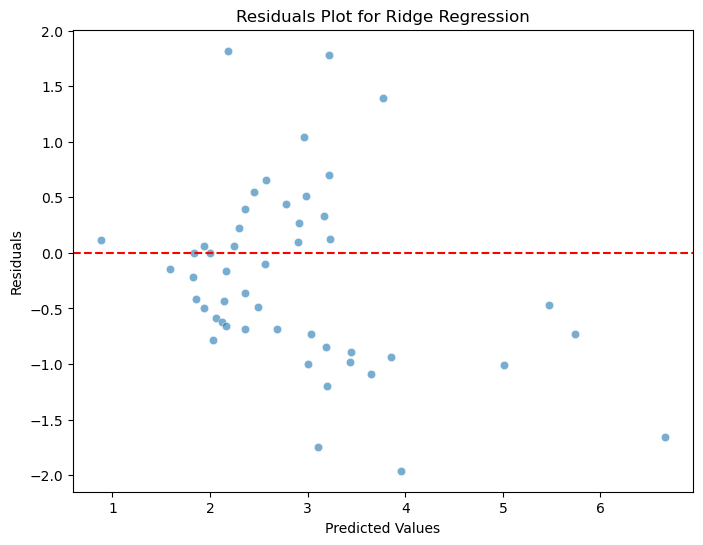

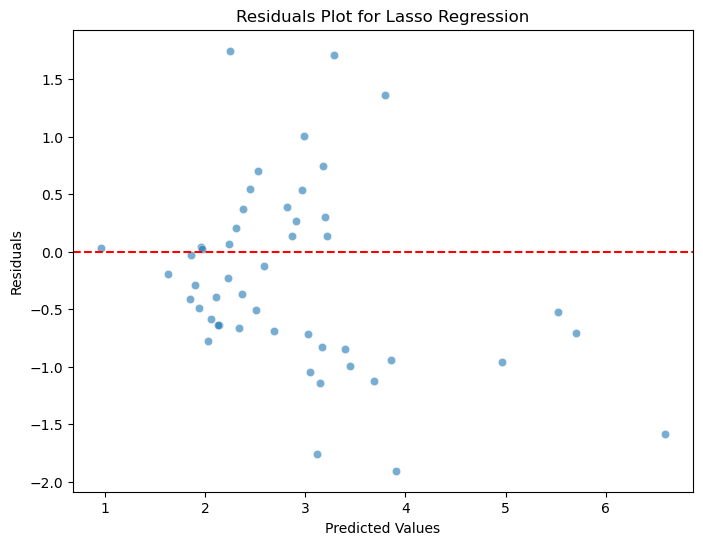

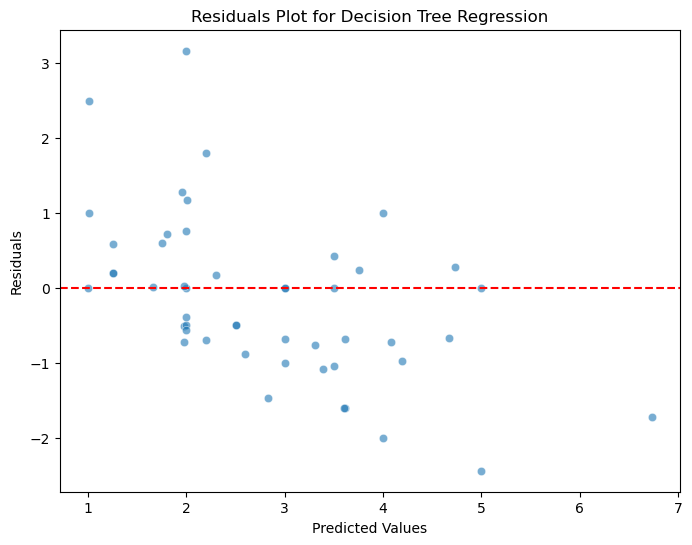

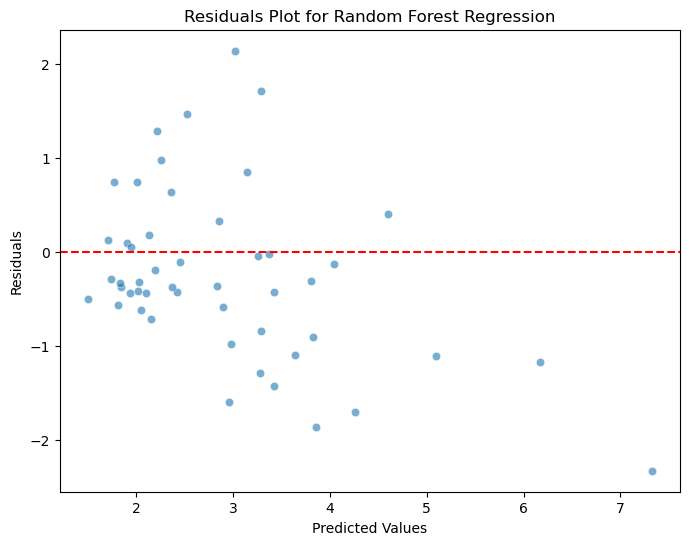

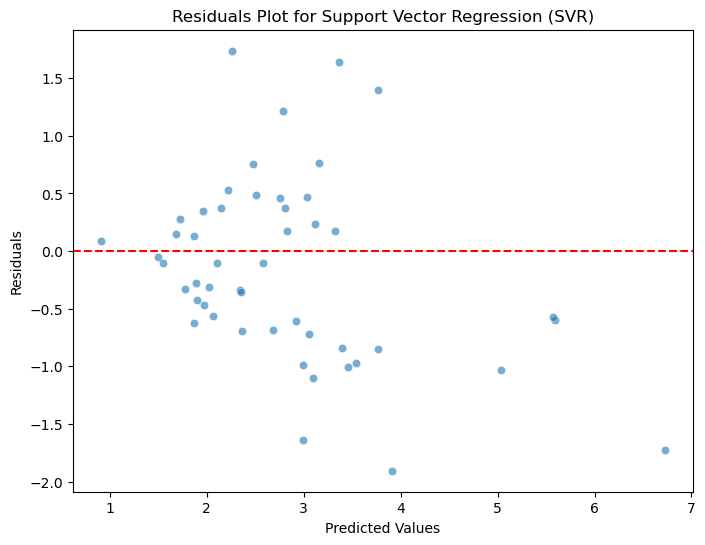

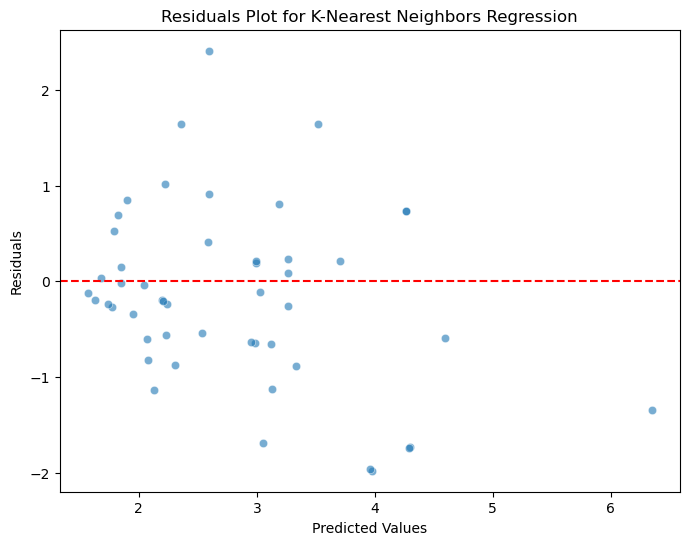

In [21]:
#Residual Plot
# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_linear = linear_reg.predict(X_test)
plot_residuals(y_test, y_pred_linear, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge_reg.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso_reg.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = tree_reg.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest_reg.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")
# 7. K-Nearest Neighbors Regression
y_pred_knn = knn_reg.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

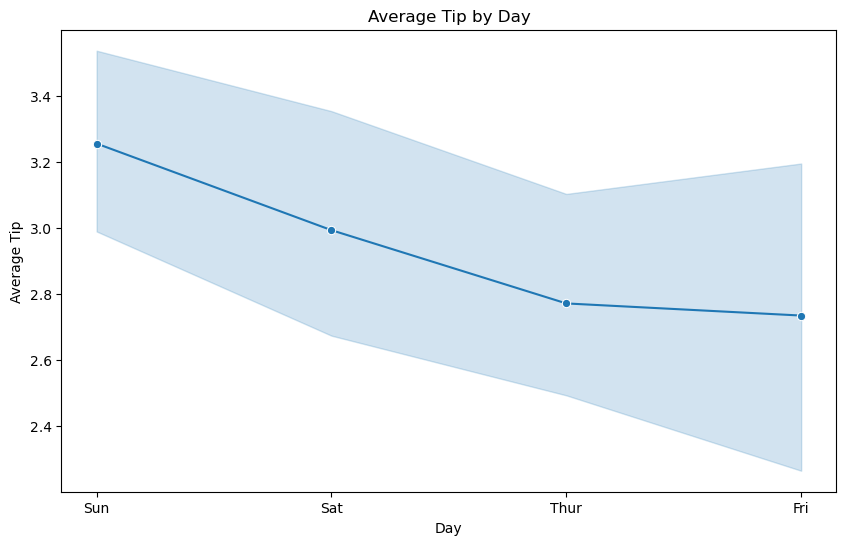

In [22]:
#Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

CONCLUSION:-
1.Larger groups tend to tip more, so offer promotions for group bookings.
2.Smokers tip less, so consider improving the experience for non-smokers and offering incentives for smokers.
3.Higher total bills lead to higher tips; train staff to upsell premium items.